<a href="https://colab.research.google.com/github/moizarsalan/Digital-Image-Processing-Labs/blob/main/Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abdul Moiz Arsalan**

**B22F1086AI072**

**Digital Image processing Lab**

**Lab Instructor: Sir Rizwan Shah**

**Course Instructor: Dr Abdul Jalil**

# **Lab 04:**

# **Scenario no 01 :**

Medical Image Analysis (X-ray & MRI Enhancement)
Doctors rely on X-ray and MRI scans to diagnose diseases, but sometimes these images have low contrast or
noise that makes it difficult to detect abnormalities. Your task is to apply image enhancement techniques to
improve visibility.

# **Tasks:**
1. Compute mean and variance to analyze brightness and contrast of the image.
2. Apply log and inverse log transformation to enhance faint details.
3. Use contrast stretching to improve bone or tissue structures.
4. Use thresholding to segment bones from the background.

# **Explanation**

This Python script enhances a grayscale image using different image processing techniques. It utilizes OpenCV for image handling, NumPy for numerical operations, and Matplotlib for visualization. The script performs multiple enhancements to improve contrast, brightness, and visibility of details in the image. Below is a breakdown of the steps:

* **Loading the Image:** The script loads the image in grayscale mode using OpenCV. If the image is not found, an error message is displayed to prevent further issues.

* **Mean & Variance Calculation:** The mean of the image represents the average brightness, while the variance measures how much pixel values differ from the mean. A higher variance indicates stronger contrast, while a lower variance means a more uniform image.

* **Log Transformation:** This technique enhances darker regions of the image. It applies a logarithm function to pixel values, which increases the intensity of lower pixel values while maintaining higher values. The transformed values are normalized back to an 8-bit range (0–255) to keep the image format intact.

* **Inverse Log Transformation:** This operation reverses the log transformation using an exponential function. It helps restore intensity variations and can be useful in cases where log transformation has over-brightened the image. Before applying the inverse log, the image is normalized for better numerical stability.

* **Contrast Stretching:** This technique improves the overall contrast of the image by spreading pixel values across the full 0–255 range. It finds the minimum and maximum pixel intensities in the image and stretches the values accordingly. This is particularly useful for images with poor contrast.

* **Thresholding:** The image is converted to a binary format (black and white). A threshold value of 127 is used—pixels greater than this value turn white (255), while the rest become black (0). This technique is commonly used in object detection and document image processing.

* **Displaying Results:** The original and processed images are displayed side by side using Matplotlib. Each image has a title for clarity, and the axis labels are hidden to improve visualization. The results allow for easy comparison of how each transformation affects the image.



Mean: 138.44, Variance: 3417.82
Log Transformation Mean: 215.97  |  Inverse Log Transformation Mean: 180.81


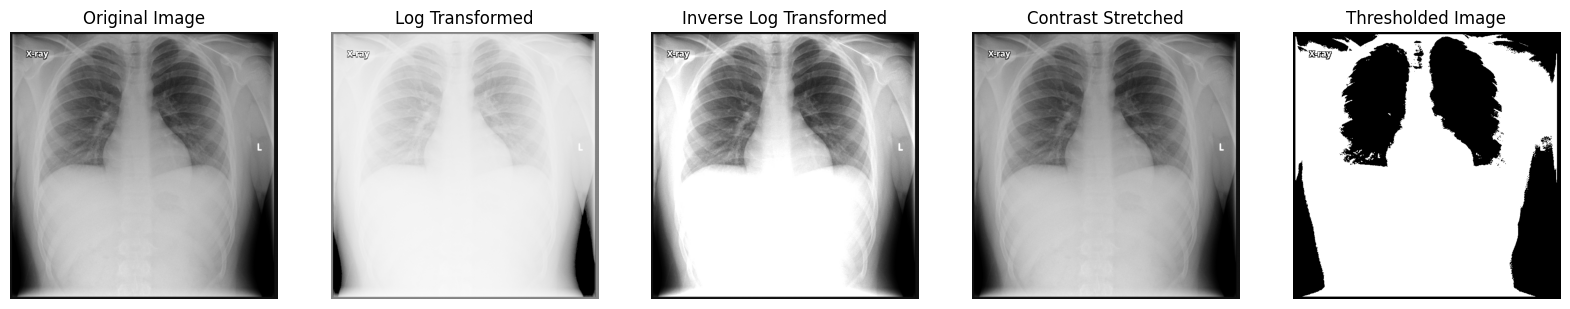

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/Scanerio 01.png', cv2.IMREAD_GRAYSCALE)

# Ensure the image is loaded correctly
if image is None:
    raise ValueError("Image not found. Please check the file path.")
# Compute Mean & Variance
mean = np.mean(image)
variance = np.var(image)
print(f"Mean: {mean:.2f}, Variance: {variance:.2f}")

# Log Transformation
log_transformed = np.log1p(image)
log_transformed = (log_transformed / log_transformed.max()) * 255
log_transformed = np.uint8(log_transformed)

# Inverse Log Transformation
image_norm = image / 255.0  # Normalize image for stability
inverse_log_transformed = (np.exp(image_norm) - 1) * 255  # Apply inverse log
inverse_log_transformed = np.uint8(np.clip(inverse_log_transformed, 0, 255))

# Contrast Stretching
min_val, max_val = np.min(image), np.max(image)
contrast_stretched = (image - min_val) / (max_val - min_val) * 255
contrast_stretched = np.uint8(contrast_stretched)

# Thresholding
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Print Log & Inverse Log Mean
log_mean = np.mean(log_transformed)
inverse_log_mean = np.mean(inverse_log_transformed)
print(f"Log Transformation Mean: {log_mean:.2f}  |  Inverse Log Transformation Mean: {inverse_log_mean:.2f}")

# Display All Images Side by Side
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(log_transformed, cmap='gray')
axes[1].set_title("Log Transformed")
axes[1].axis('off')

axes[2].imshow(inverse_log_transformed, cmap='gray')
axes[2].set_title("Inverse Log Transformed")
axes[2].axis('off')

axes[3].imshow(contrast_stretched, cmap='gray')
axes[3].set_title("Contrast Stretched")
axes[3].axis('off')

axes[4].imshow(thresholded, cmap='gray')
axes[4].set_title("Thresholded Image")
axes[4].axis('off')

plt.show()


# **Scenario no 02:**

License Plate Recognition in Traffic Monitoring
A traffic monitoring system needs to automatically recognize license plates from surveillance footage.
However, due to varying lighting conditions, some license plates appear too dark or too bright.

**Tasks:**
1. Convert image to grayscale.
2. Apply gray level transformation to improve visibility.
3. Use thresholding function to separate text from the background.
4. Apply log transformation to enhance low-light images.
5. Compute mean and variance to adjust brightness dynamically.

# **Explanation:**

This Python code loads and displays a grayscale image using OpenCV and Matplotlib.

* Loading the Image: cv2.imread() reads the image in grayscale mode, reducing it to a single intensity channel.
* Displaying the Image: plt.imshow(image, cmap='gray') ensures proper grayscale visualization.
* Enhancing Readability: plt.title('Original Image') adds a title, and plt.axis('off') hides axis labels for a cleaner display.
Rendering: plt.show() displays the image.

# **Load image in Gray Scale**

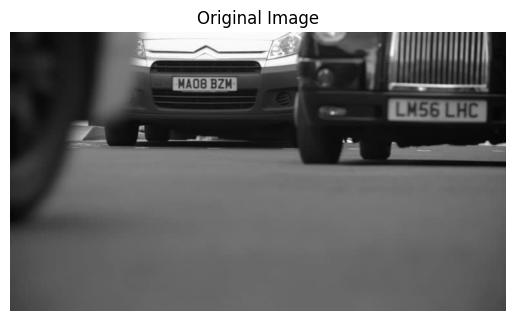

In [2]:
image = cv2.imread('/content/Scanerio 02.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


# **Histogram Equalization**

**Explanation:**

This Python code applies histogram equalization to enhance the contrast of a grayscale image and then displays the result using Matplotlib.

**Applying Histogram Equalization:**

   * cv2.equalizeHist(image) enhances contrast by redistributing pixel intensity values more evenly across the histogram.
   * This technique is particularly useful for improving visibility in low-contrast images.

**Displaying the Image:**

* plt.imshow(equalized, cmap='gray') ensures the processed image is displayed in grayscale.
* plt.title('Histogram Equalized Image') adds a title for clarity.
* plt.axis('off') removes axis labels for a cleaner view.
* plt.show() renders and displays the image.

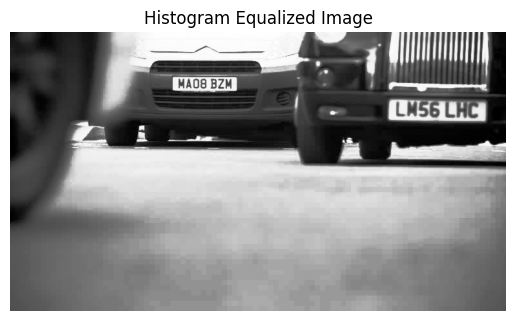

In [3]:
equalized = cv2.equalizeHist(image)

plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()


# **Threshold Image**

**Explanation:**

This code applies adaptive thresholding to the histogram-equalized image, converting it into a binary (black and white) format for better feature extraction.

**Adaptive Thresholding:**

* **cv2.adaptiveThreshold()** dynamically determines the threshold for different regions, improving results on uneven lighting conditions.
* **cv2.ADAPTIVE_THRESH_GAUSSIAN_C** uses a weighted sum of neighboring pixel values for threshold calculation.
* The parameters (11, 2) define the neighborhood size and a constant subtracted from the mean.

**Displaying the Image:**

* **plt.imshow(thresholded, cmap='gray')** ensures proper grayscale visualization.
* **plt.title('Thresholded Image')** and **plt.axis('off')** enhance clarity.
* **plt.show()** renders the image.

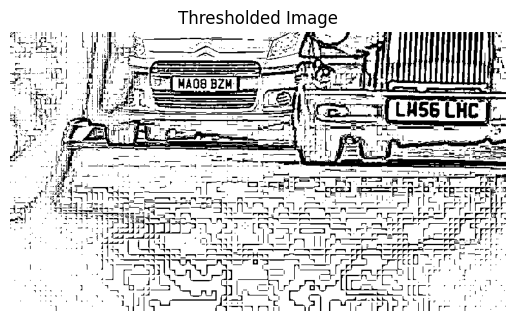

In [4]:
thresholded = cv2.adaptiveThreshold(equalized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


# **Log Transformed Image**

**Explanation:**

This code applies log transformation to enhance darker regions of a grayscale image and improves visibility in low-intensity areas.

**Log Transformation:**

* np.log1p(image) applies a logarithmic function, which enhances small pixel values more than larger ones.
* The result is normalized by dividing by the maximum value and scaled to 8-bit (0–255) format.
* np.uint8(log_transformed) ensures proper image representation.

**Displaying the Image:**

* plt.imshow(log_transformed, cmap='gray') ensures grayscale visualization.
* plt.title('Log Transformed Image') and plt.axis('off') improve clarity.
* plt.show() renders the image.


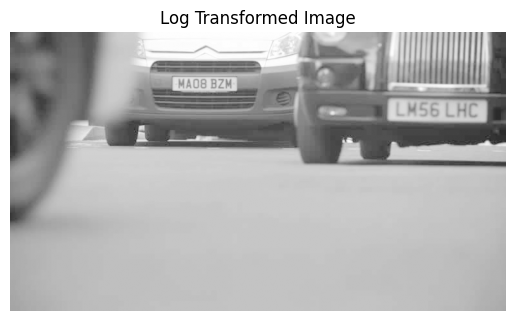

In [5]:
log_transformed = np.log1p(image)
log_transformed = (log_transformed / log_transformed.max()) * 255
log_transformed = np.uint8(log_transformed)

plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()


# **Calculating mean and variance**

This code calculates and prints the mean and variance of a grayscale image.

**Mean:**

* np.mean(image) computes the average pixel intensity, providing an idea of the overall brightness of the image.

**Variance:**

* np.var(image) calculates the spread of pixel values, indicating the contrast or variation in the image. A higher variance means more contrast.

In [6]:
mean = np.mean(image)
variance = np.var(image)
print(f"Mean: {mean}, Variance: {variance}")

Mean: 90.9577938126929, Variance: 2117.1767276317732


# **Scenario 03:**

Satellite Image Enhancement for Disaster Management
After a flood or wildfire, satellite images are used to assess damage. However, raw images may have poor
contrast or too much noise due to atmospheric interference.

**Tasks:**
1. Apply Fourier Transform (FFT) to remove noise.
2. Use contrast stretching to highlight affected regions.
3. Apply power-law transformation (gamma correction) to enhance different land types.
4. Compute mean and variance to detect high-reflectance areas (e.g., water bodies after a flood).
5. Apply thresholding function to separate affected regions from normal land.

# **Loading Image:**

**Explanation:**

This code loads and displays a grayscale satellite image.

**Loading the Image:**

* cv2.imread() loads the image from the specified path in grayscale mode.

**Displaying the Image:**
* plt.imshow(image, cmap='gray') displays the image in grayscale.
* plt.title('Original Satellite Image') adds a title, and plt.axis('off') removes axis labels for clarity.
* plt.show() renders the image

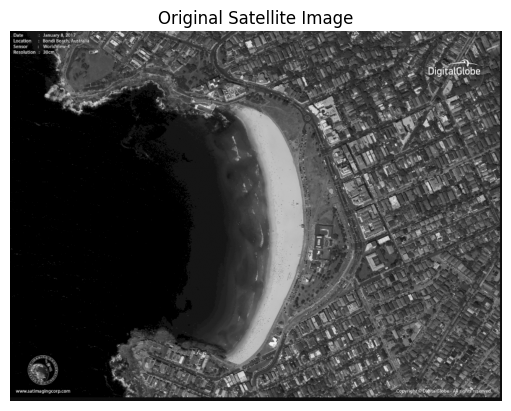

In [7]:
image = cv2.imread('/content/Scanerio 03.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Satellite Image')
plt.axis('off')
plt.show()


# **Applying Fourier Transform**

This code applies Fourier Transform to analyze the frequency components of an image.

**Fourier Transform:**

* np.fft.fft2(image) computes the 2D Fourier Transform of the image, converting it from the spatial domain to the frequency domain.
* np.fft.fftshift(f) shifts the zero-frequency component to the center of the spectrum.
* 20 * np.log(np.abs(fshift)) calculates the magnitude spectrum and enhances visibility by using a logarithmic scale.

**Displaying the Image:**

* plt.imshow(magnitude_spectrum, cmap='gray') visualizes the frequency spectrum.
* plt.title('Fourier Transform') and plt.axis('off') enhance clarity.
* plt.show() renders the image.

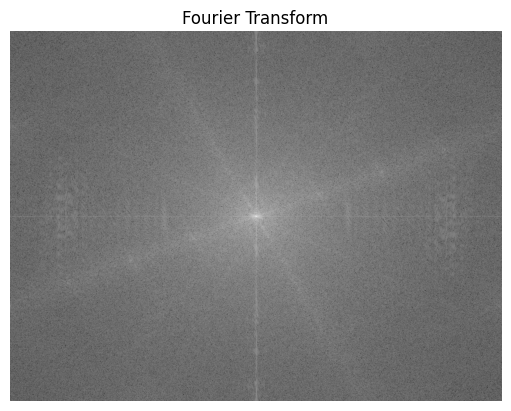

In [8]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')
plt.show()


# **Contrast Shaded Image**

**Explanation:**

This code applies contrast stretching to enhance the contrast of an image.

**Contrast Stretching:**

* np.min(image) and np.max(image) find the minimum and maximum pixel values in the image.
* (image - min_val) / (max_val - min_val) * 255 linearly stretches the pixel values to cover the full range of 0–255.
* np.uint8(contrast_stretched) ensures the result is properly formatted as an 8-bit image.

**Displaying the Image:**

* plt.imshow(contrast_stretched, cmap='gray') visualizes the contrast-enhanced image.
* plt.title('Contrast Stretched Image') and plt.axis('off') improve clarity.
* plt.show() renders the image.

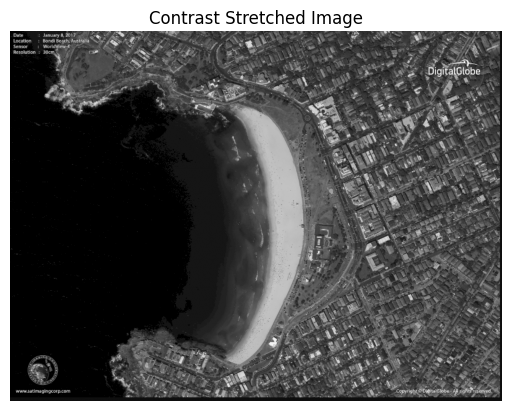

In [9]:
min_val, max_val = np.min(image), np.max(image)
contrast_stretched = (image - min_val) / (max_val - min_val) * 255
contrast_stretched = np.uint8(contrast_stretched)

plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')
plt.show()


# **Gamma Corrected Image:**

# **Explanation:**
This code applies gamma correction to adjust the brightness of the image.

**Gamma Correction:**

* np.power(image / 255.0, gamma) applies the gamma function to adjust the brightness based on the specified gamma value (1.5 in this case).
* The result is scaled back to the 0–255 range with * 255, and np.uint8(gamma_corrected) ensures the result is in the correct format.

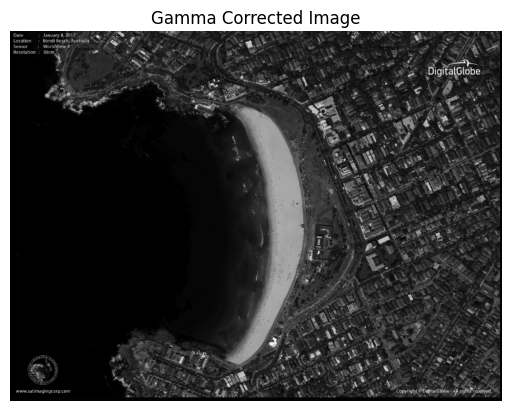

In [10]:
gamma = 1.5
gamma_corrected = np.power(image / 255.0, gamma) * 255
gamma_corrected = np.uint8(gamma_corrected)

plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Corrected Image')
plt.axis('off')
plt.show()


# **Calculating Mean and Variance**

**Explanation:**

This code calculates the mean and variance of the pixel values in an image to analyze its brightness and contrast.

**Mean:**
* np.mean(image) computes the average pixel intensity of the image, giving an overall sense of its brightness.

**Variance:**
* np.var(image) calculates the variance, which measures how much the pixel values deviate from the mean. A higher variance indicates higher contrast.

In [11]:
mean = np.mean(image)
variance = np.var(image)
print(f"Mean: {mean}, Variance: {variance}")


Mean: 60.445919542960304, Variance: 2671.140805855037


# **Threshold Image:**

# **Explanation:**

This code applies thresholding to convert the grayscale image into a binary image (black and white).

**Thresholding:**

* cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) converts pixel values greater than 127 to 255 (white) and those less than or equal to 127 to 0 (black), creating a binary image.
* The threshold value 127 can be adjusted based on the desired separation between foreground and background.


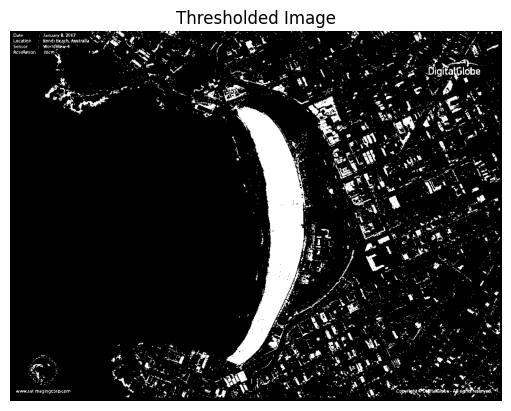

In [12]:
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


# **Scenario 04:**

Enhancing Old Manuscripts for Digital Archiving
Libraries and museums often digitize old manuscripts for preservation. However, these documents may have
faded ink, uneven lighting, and noise that make them hard to read.

**Tasks:**
1. Compute mean and variance to check overall brightness.
2. Use log transformation to enhance faded text.
3. Apply gray-level transformation to balance lighting.
4. Apply contrast stretching to improve readability.
5. Use thresholding to remove the background and extract text.

# **Loading the Image:**

This code loads and displays a grayscale image of a manuscript for further processing.

**Loading the Image:**

* cv2.imread('//content/Scanerio 04.png', cv2.IMREAD_GRAYSCALE) reads the image from the specified file path in grayscale mode (black and white), which simplifies further image processing tasks.


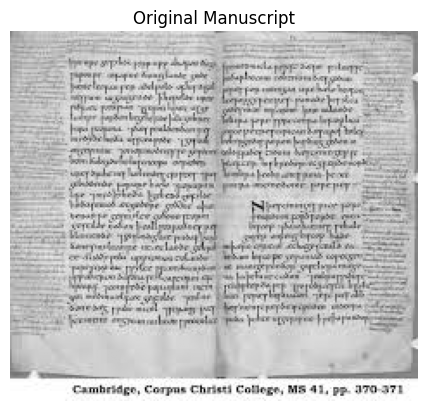

In [13]:
image = cv2.imread('//content/Scanerio 04.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Manuscript')
plt.axis('off')
plt.show()


# **Calculating Mean and Variance**

**Explanation:**

This code calculates the mean and variance of pixel values in the image to analyze its overall brightness and contrast.

**Mean:**
* np.mean(image) computes the average pixel intensity of the image. It represents the brightness of the image, with higher values indicating a brighter image.

**Variance:**
* np.var(image) calculates the variance of pixel values, which measures how much the pixel intensities deviate from the mean. A higher variance suggests greater contrast, meaning more variation in pixel intensity.

In [14]:
mean = np.mean(image)
variance = np.var(image)
print(f"Mean: {mean}, Variance: {variance}")


Mean: 188.1802827498812, Variance: 1264.4272834936307


# **Log Transformation:**

Explanation:

This code applies log transformation to enhance the darker regions of the image, making it useful for improving visibility in low-intensity areas.

**Log Transformation:**

* np.log1p(image) applies the logarithmic function to the image, enhancing darker areas more than lighter ones.
* The result is normalized by dividing by the maximum pixel value and scaled to the 0–255 range with * 255.
* np.uint8(log_transformed) ensures that the output is in the appropriate 8-bit image format.

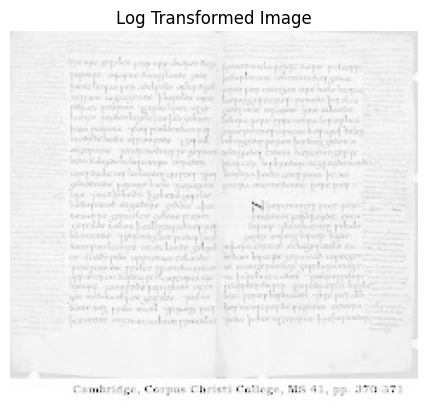

In [15]:
log_transformed = np.log1p(image)
log_transformed = (log_transformed / log_transformed.max()) * 255
log_transformed = np.uint8(log_transformed)

plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()


# **Historgram Equalization:**


Explanation:

This code applies histogram equalization to improve the contrast of the image by redistributing its pixel intensity values more evenly.

**Histogram Equalization:**

* cv2.equalizeHist(image) spreads out the most frequent intensity values over the entire available range (0-255), improving overall contrast. This is especially helpful in images with low contrast.

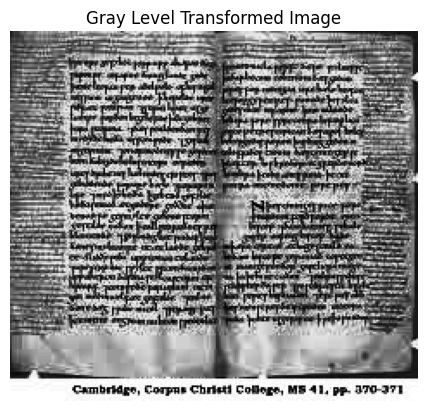

In [16]:
equalized = cv2.equalizeHist(image)

plt.imshow(equalized, cmap='gray')
plt.title('Gray Level Transformed Image')
plt.axis('off')
plt.show()


# **Contrast Streched Image:**

**Explanation:**

This code applies contrast stretching to enhance the contrast of the image by expanding the pixel intensity values to cover the full 0-255 range.

**Contrast Stretching:**

* np.min(image) and np.max(image) determine the minimum and maximum pixel values in the image.
* (image - min_val) / (max_val - min_val) * 255 linearly stretches the pixel values so that the minimum becomes 0 and the maximum becomes 255, improving contrast.
* np.uint8(contrast_stretched) ensures the result is an 8-bit image suitable for display.

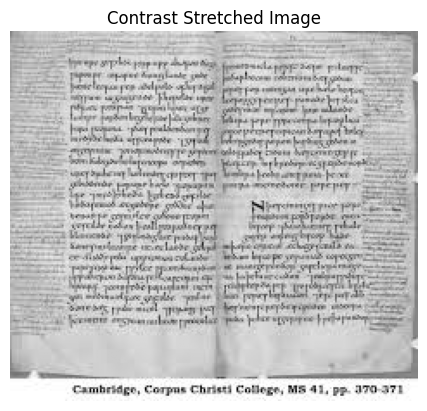

In [17]:
min_val, max_val = np.min(image), np.max(image)
contrast_stretched = (image - min_val) / (max_val - min_val) * 255
contrast_stretched = np.uint8(contrast_stretched)

plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')
plt.show()


# **Threshold Image:**

**Explanation:**

This code applies adaptive thresholding to the histogram-equalized image, converting it into a binary image (black and white) for better feature extraction.

**Adaptive Thresholding:**

* cv2.adaptiveThreshold() dynamically calculates the threshold value for each pixel based on its surrounding region.
* cv2.ADAPTIVE_THRESH_MEAN_C uses the mean of the neighborhood pixels to determine the threshold.
* cv2.THRESH_BINARY sets pixels greater than the threshold to 255 (white) and those below to 0 (black).
* The parameters 11 and 2 define the block size (11x11 pixels) and a constant subtracted from the mean threshold value.

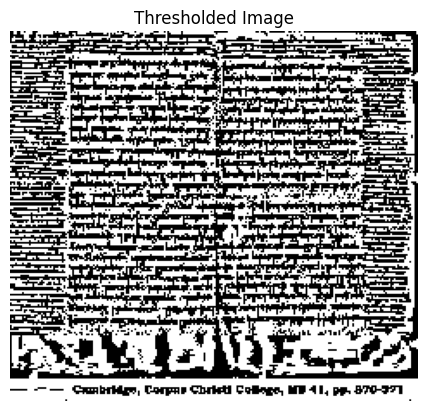

In [18]:
thresholded = cv2.adaptiveThreshold(equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()
